In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gridDS= Dataset('/scratch/srai6/EddyKillingPaper3/CESM/all7yrs_land0/tripoleGridCreated.nc')
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/all7yrs_land0/'
KMT = np.array(gridDS.variables['KMT'])
UAREA = np.array(gridDS.variables['UAREA'])
ULAT = np.array(gridDS.variables['ULAT'])
ULONG = np.array(gridDS.variables['ULONG'])
landMask = KMT < 1
landMask += abs(ULAT)<=3

ds1 = Dataset(fldLoc + '100km_smth/011.nc_0100_Filtered.nc')
EPPA = np.array(ds1.variables['EddyPowerPerArea'][0,:,:])

landMask = EPPA == 0

In [3]:
fileName = fldLoc + 'spectraPeak_smth.nc'
ds=Dataset(fileName)
spectraPeak = np.array(ds.variables['spectraPeakEll'][:,:,:])
spectraPeak[:,landMask]= float('nan')
tavgSpectraPeak = np.mean(spectraPeak, axis=0)

In [4]:
# cmap = plt.get_cmap('gist_ncar').copy()
# cmap.set_bad('grey')
# plt.pcolormesh(tavgSpectraPeak,cmap=cmap)
# plt.colorbar()

In [5]:
# fileName = fldLoc + 'spectraPeak.nc'
# ds=Dataset(fileName)
# spectraPeak = np.array(ds.variables['spectraPeak'][:,:])
# spectraPeak[landMask]= float('nan')
# cmap = plt.get_cmap('gist_ncar').copy()
# cmap.set_bad('grey')
# plt.pcolormesh(spectraPeak,cmap=cmap)
# plt.colorbar()

In [6]:
np.nanmax(spectraPeak)

330.0

In [7]:
ds = Dataset(fldLoc + 'spectraLatBands.nc')
latBands = ds.variables['latbands'][:]
ell = ds.variables['ell'][:]
spectra = np.array(ds.variables['spectra'][:,:,:])
latBands.shape

(17,)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/local_scratch/17626843/ipykernel_23701/2710757823.py:21: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


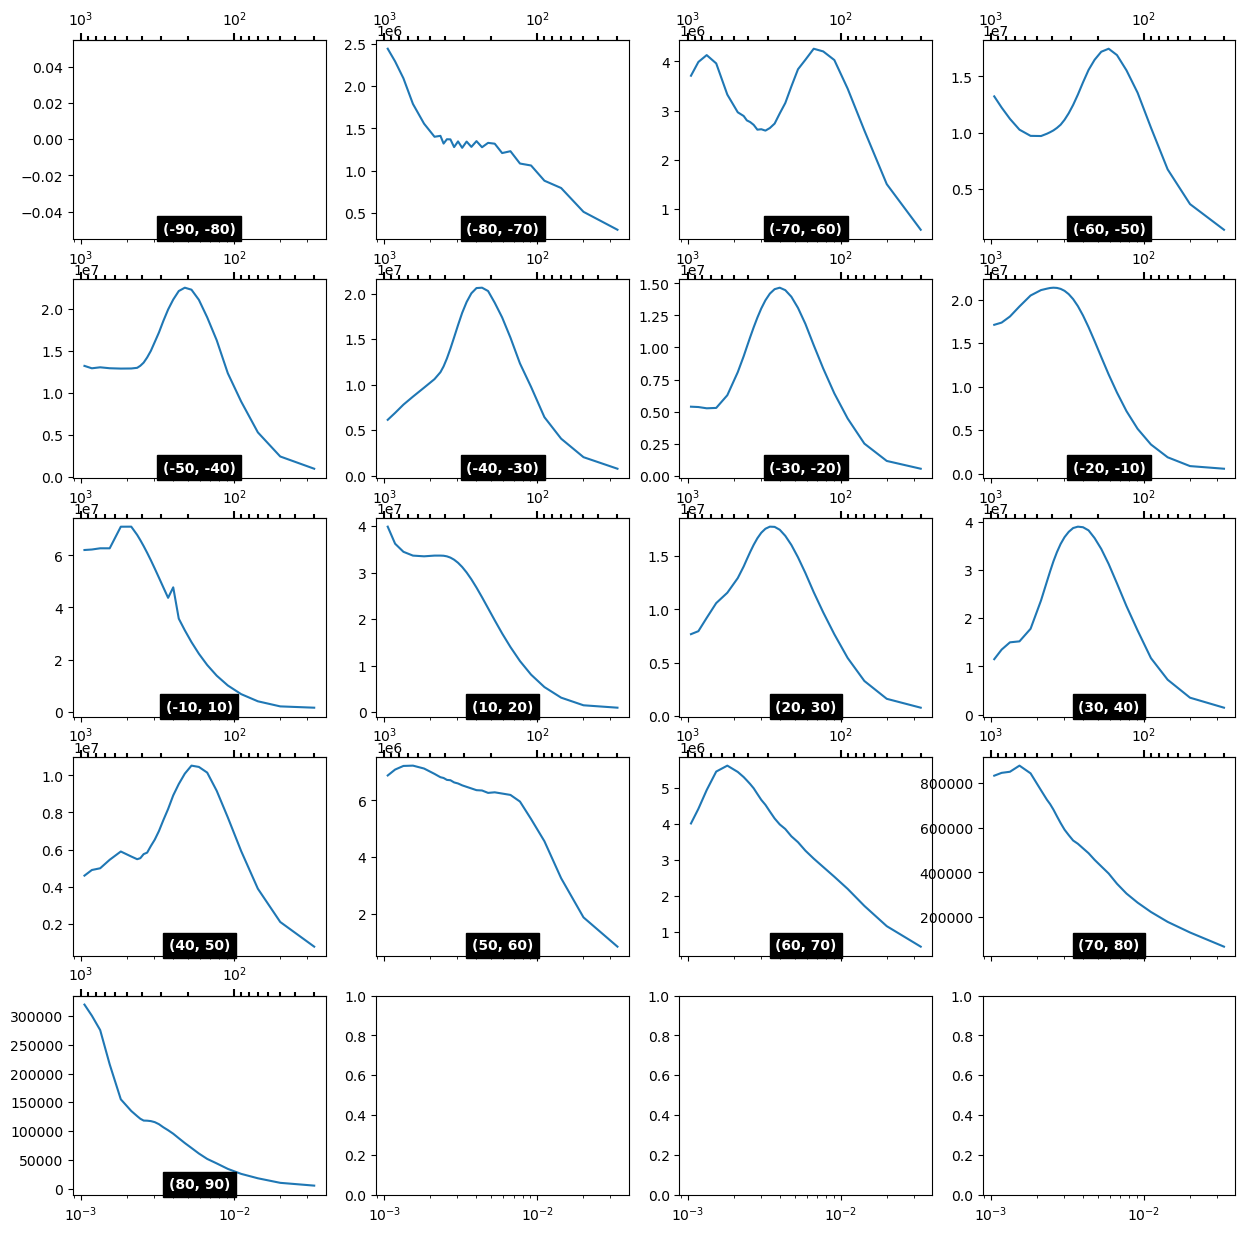

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15,15), sharex = True, sharey=False)
latbandList = np.arange(17)
for i in range(17):
    ii = int(i//4)
    jj = i%4
    #print(ii,jj)
    ax = axes[ii,jj]
    latBandIndx = latbandList[i]
    print(latBandIndx)
    for i in range(1):
        ax.plot(1/(ell/1000),spectra[i,latBandIndx,:])
    ax.set_xscale('log')
    
    def forward(x):
        #print('forward', x)
        return 1.0 / x


    def inverse(x):
        #print('reverse', x)
        return 1.0 / x

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    secax.tick_params(which='major', width=1.5, length=5, labelsize=10)
    secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
    
    xpos, ypos = 0.5, 0.05
    t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, 
        fontsize = 10, weight='heavy', color='white')
    t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/local_scratch/17626843/ipykernel_23701/3497317360.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


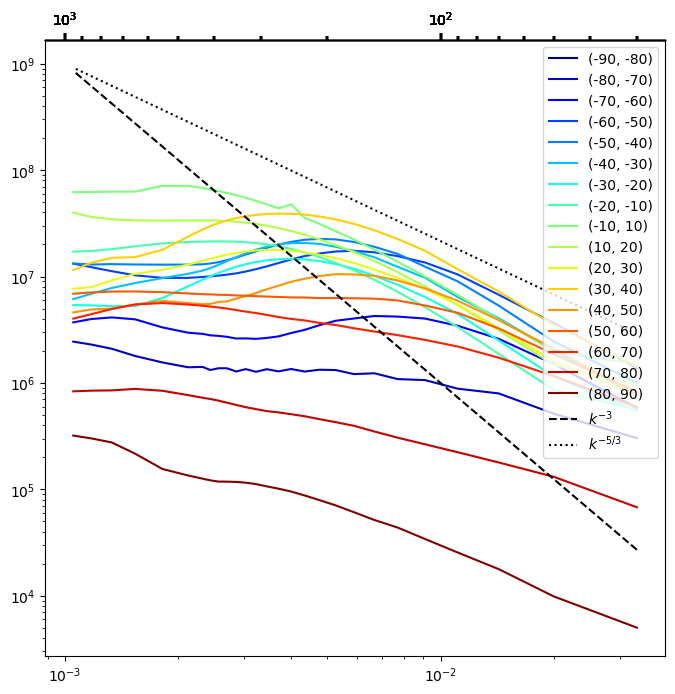

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex = True, sharey=False)
latbandList = np.arange(17)
colors = plt.cm.jet(np.linspace(0,1,17))
for i in range(17):
    ax = axes
    latBandIndx = latbandList[i]
    print(latBandIndx)
    ax.plot(1/(ell/1000),spectra[0,latBandIndx,:], label = latBands[latBandIndx], color=colors[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    def forward(x):
        #print('forward', x)
        return 1.0 / x


    def inverse(x):
        #print('reverse', x)
        return 1.0 / x

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    secax.tick_params(which='major', width=1.5, length=5, labelsize=10)
    secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
    
#     xpos, ypos = 0.5, 0.05
#     t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
#          verticalalignment='center', transform=ax.transAxes, 
#         fontsize = 10, weight='heavy', color='white')
#     t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])
    
km3 = (1/(ell/1000))**(-3)
km53 = 1e4*(1/(ell/1000))**(-5/3)
ax.plot(1/(ell/1000), km3, linestyle='dashed', label = r'$k^{-3}$',color = 'k')
ax.plot(1/(ell/1000), km53, linestyle=':', label = r'$k^{-5/3}$',color = 'k')
plt.legend()


1
4
7
10
13
16


/local_scratch/17626843/ipykernel_23701/2130456167.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


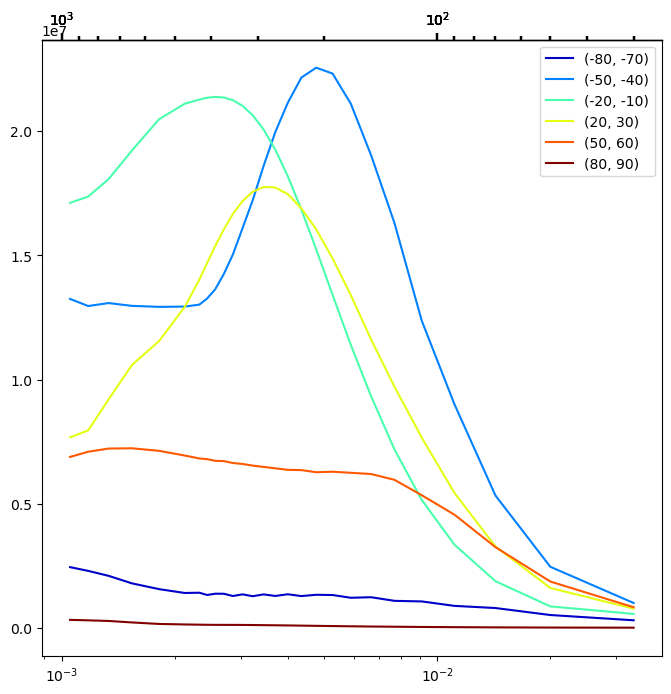

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex = True, sharey=False)
latbandList = np.arange(17)
colors = plt.cm.jet(np.linspace(0,1,17))
for i in range(1,17,3):
    ax = axes
    latBandIndx = latbandList[i]
    print(latBandIndx)
    ax.plot(1/(ell/1000),spectra[0,latBandIndx,:], label = latBands[latBandIndx], color=colors[i])
    ax.set_xscale('log')
    
    def forward(x):
        #print('forward', x)
        return 1.0 / x


    def inverse(x):
        #print('reverse', x)
        return 1.0 / x

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    secax.tick_params(which='major', width=1.5, length=5, labelsize=10)
    secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
    
#     xpos, ypos = 0.5, 0.05
#     t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
#          verticalalignment='center', transform=ax.transAxes, 
#         fontsize = 10, weight='heavy', color='white')
#     t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])
    
plt.legend()

14
15
16


/local_scratch/17626843/ipykernel_23701/4246380767.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


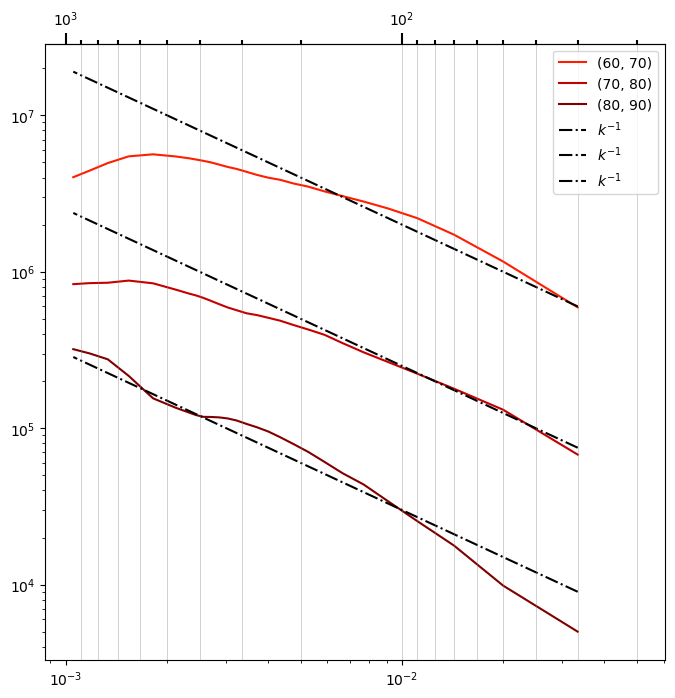

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex = True, sharey=False)
latbandList = np.arange(17)
colors = plt.cm.jet(np.linspace(0,1,17))
for i in range(14,17):
    ax = axes
    latBandIndx = latbandList[i]
    print(latBandIndx)
    ax.plot(1/(ell/1000),spectra[0,latBandIndx,:], label = latBands[latBandIndx], color=colors[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def forward(x):
    #print('forward', x)
    return 1.0 / x


def inverse(x):
    #print('reverse', x)
    return 1.0 / x

km1 = 1e4*(1/(ell/1000))**(-1)
km3 = (1/(ell/1000))**(-3)
km53 = 1e4*(1/(ell/1000))**(-5/3)
ax.plot(1/(ell/1000), 2*km1, linestyle='-.', label = r'$k^{-1}$',color = 'k')
ax.plot(1/(ell/1000), 0.03*km1, linestyle='-.', label = r'$k^{-1}$',color = 'k')
ax.plot(1/(ell/1000), 0.25*km1, linestyle='-.', label = r'$k^{-1}$',color = 'k')

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.tick_params(which='major', width=1.5, length=8, labelsize=10)
secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
for i in range(20,100,10):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
for i in range(100,1000, 100):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
    
#     xpos, ypos = 0.5, 0.05
#     t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
#          verticalalignment='center', transform=ax.transAxes, 
#         fontsize = 10, weight='heavy', color='white')
#     t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])

# ax.plot(1/(ell/1000), km3, linestyle='dashed', label = r'$k^{-3}$',color = 'k')
# ax.plot(1/(ell/1000), km53, linestyle=':', label = r'$k^{-5/3}$',color = 'k')
plt.legend()


11
12
13


/local_scratch/17626843/ipykernel_23701/3416312426.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


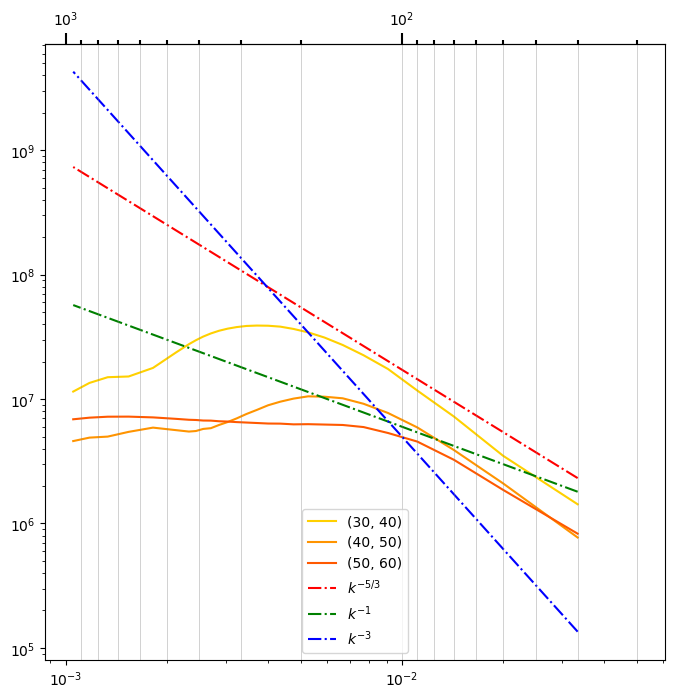

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex = True, sharey=False)
latbandList = np.arange(17)
colors = plt.cm.jet(np.linspace(0,1,17))
for i in range(11,14):
    ax = axes
    latBandIndx = latbandList[i]
    print(latBandIndx)
    ax.plot(1/(ell/1000),spectra[0,latBandIndx,:], label = latBands[latBandIndx], color=colors[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def forward(x):
    #print('forward', x)
    return 1.0 / x


def inverse(x):
    #print('reverse', x)
    return 1.0 / x

km1 = 1e4*(1/(ell/1000))**(-1)
km3 = (1/(ell/1000))**(-3)
km53 = 1e4*(1/(ell/1000))**(-5/3)
ax.plot(1/(ell/1000), 0.8*km53, linestyle='-.', label = r'$k^{-5/3}$',color = 'r')
ax.plot(1/(ell/1000), 60e-1*km1, linestyle='-.', label = r'$k^{-1}$',color = 'g')
ax.plot(1/(ell/1000), 50e-1*km3, linestyle='-.', label = r'$k^{-3}$',color = 'b')

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.tick_params(which='major', width=1.5, length=8, labelsize=10)
secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
for i in range(20,100,10):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
for i in range(100,1000, 100):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
    
#     xpos, ypos = 0.5, 0.05
#     t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
#          verticalalignment='center', transform=ax.transAxes, 
#         fontsize = 10, weight='heavy', color='white')
#     t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])

# ax.plot(1/(ell/1000), km3, linestyle='dashed', label = r'$k^{-3}$',color = 'k')
# ax.plot(1/(ell/1000), km53, linestyle=':', label = r'$k^{-5/3}$',color = 'k')
plt.legend()


8
9
10


/local_scratch/17626843/ipykernel_23701/3604981983.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


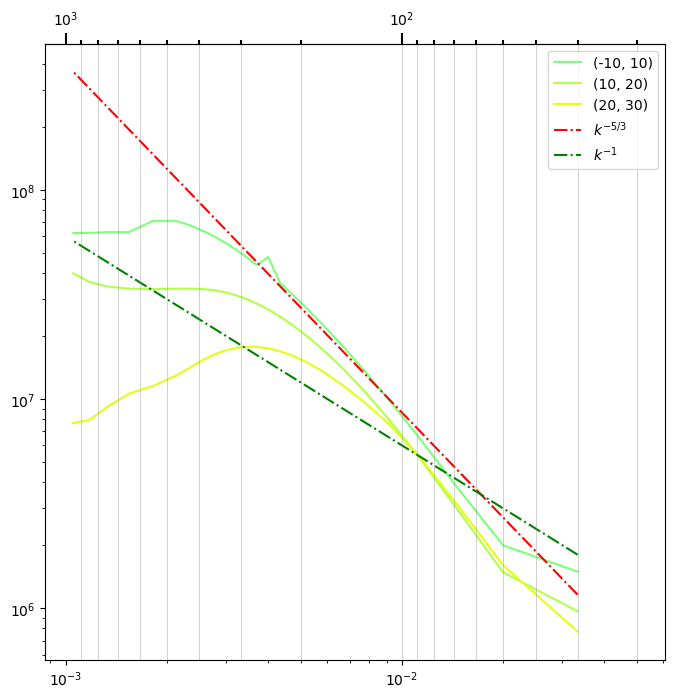

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex = True, sharey=False)
latbandList = np.arange(17)
colors = plt.cm.jet(np.linspace(0,1,17))
for i in range(8,11):
    ax = axes
    latBandIndx = latbandList[i]
    print(latBandIndx)
    ax.plot(1/(ell/1000),spectra[0,latBandIndx,:], label = latBands[latBandIndx], color=colors[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def forward(x):
    #print('forward', x)
    return 1.0 / x


def inverse(x):
    #print('reverse', x)
    return 1.0 / x

km1 = 1e4*(1/(ell/1000))**(-1)
km3 = (1/(ell/1000))**(-3)
km53 = 1e4*(1/(ell/1000))**(-5/3)
ax.plot(1/(ell/1000), 0.4*km53, linestyle='-.', label = r'$k^{-5/3}$',color = 'r')
ax.plot(1/(ell/1000), 60e-1*km1, linestyle='-.', label = r'$k^{-1}$',color = 'g')
#ax.plot(1/(ell/1000), 50e-1*km3, linestyle='-.', label = r'$k^{-3}$',color = 'b')

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.tick_params(which='major', width=1.5, length=8, labelsize=10)
secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
for i in range(20,100,10):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
for i in range(100,1000, 100):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
    
#     xpos, ypos = 0.5, 0.05
#     t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
#          verticalalignment='center', transform=ax.transAxes, 
#         fontsize = 10, weight='heavy', color='white')
#     t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])

# ax.plot(1/(ell/1000), km3, linestyle='dashed', label = r'$k^{-3}$',color = 'k')
# ax.plot(1/(ell/1000), km53, linestyle=':', label = r'$k^{-5/3}$',color = 'k')
plt.legend()


5
6
7


/local_scratch/17626843/ipykernel_23701/3026781160.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / x


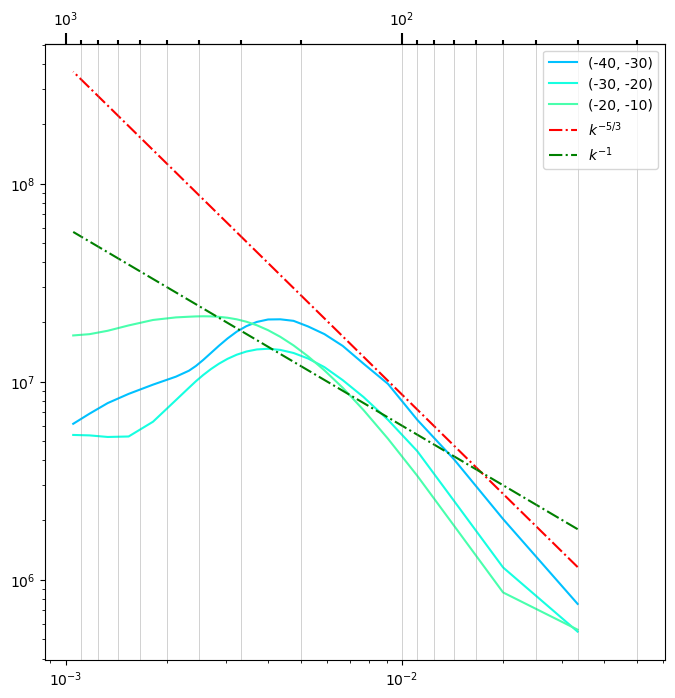

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex = True, sharey=False)
latbandList = np.arange(17)
colors = plt.cm.jet(np.linspace(0,1,17))
for i in range(5,8):
    ax = axes
    latBandIndx = latbandList[i]
    print(latBandIndx)
    ax.plot(1/(ell/1000),spectra[0,latBandIndx,:], label = latBands[latBandIndx], color=colors[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    
def forward(x):
    #print('forward', x)
    return 1.0 / x


def inverse(x):
    #print('reverse', x)
    return 1.0 / x

km1 = 1e4*(1/(ell/1000))**(-1)
km3 = (1/(ell/1000))**(-3)
km53 = 1e4*(1/(ell/1000))**(-5/3)
ax.plot(1/(ell/1000), 0.4*km53, linestyle='-.', label = r'$k^{-5/3}$',color = 'r')
ax.plot(1/(ell/1000), 60e-1*km1, linestyle='-.', label = r'$k^{-1}$',color = 'g')
#ax.plot(1/(ell/1000), 50e-1*km3, linestyle='-.', label = r'$k^{-3}$',color = 'b')

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.tick_params(which='major', width=1.5, length=8, labelsize=10)
secax.tick_params(which='minor', width=1.5, length=3, labelsize=10)
for i in range(20,100,10):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
for i in range(100,1000, 100):
    ax.axvline(x=1/i, color='grey', linewidth=0.5, alpha=0.5)
    
#     xpos, ypos = 0.5, 0.05
#     t = ax.text(xpos, ypos, latBands[latBandIndx], horizontalalignment='center',
#          verticalalignment='center', transform=ax.transAxes, 
#         fontsize = 10, weight='heavy', color='white')
#     t.set_bbox(dict(facecolor='black', alpha=1, edgecolor=None))
    #ax.title(latBands[0])

# ax.plot(1/(ell/1000), km3, linestyle='dashed', label = r'$k^{-3}$',color = 'k')
# ax.plot(1/(ell/1000), km53, linestyle=':', label = r'$k^{-5/3}$',color = 'k')
plt.legend()
